In [15]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

from gym_env_market.BertrandEnv import *
from agents import *

# hyperparameters

In [16]:
# env
n_firms = 2
m=50
mu=0.25
a=1
a0=0
c=1
xi=0.1

# Agents
epsilon_start=1.0
epsilon_decay=0.999995
epsilon_min=0.0
gamma=0.95
alpha=0.1

n_episodes=100_000

# Initialize env

In [17]:
env = BertrandEnv(
    n_firms=n_firms,
    m=m,
    mu=mu,
    a=a,
    a0=a0,
    c=c,
    xi=xi
)

1.3007800394953692 1.3716715000546615
[1.30078004 1.3022268  1.30367357 1.30512033 1.3065671  1.30801386
 1.30946063 1.31090739 1.31235416 1.31380092 1.31524768 1.31669445
 1.31814121 1.31958798 1.32103474 1.32248151 1.32392827 1.32537504
 1.3268218  1.32826857 1.32971533 1.33116209 1.33260886 1.33405562
 1.33550239 1.33694915 1.33839592 1.33984268 1.34128945 1.34273621
 1.34418297 1.34562974 1.3470765  1.34852327 1.34997003 1.3514168
 1.35286356 1.35431033 1.35575709 1.35720386 1.35865062 1.36009738
 1.36154415 1.36299091 1.36443768 1.36588444 1.36733121 1.36877797
 1.37022474 1.3716715 ]


# Initialize agents

In [18]:
print(env.action_space.n)

50


In [19]:
agents = [QLearningAgent(env.action_space.n,
                        env.action_space.n,
                        gamma=gamma,
                        alpha=alpha,
                        epsilon_decay=epsilon_decay,
                        epsilon_min=epsilon_min,
                        epsilon_start= epsilon_start
                        ) for _ in range(n_firms)]

In [20]:
actions = [agent.choose_action([14, 4]) for agent in agents]

In [21]:
print(actions)

[4, 43]


# training

In [22]:
prices_1 = []
prices_2 = []


for episode in tqdm(range(n_episodes), desc="Training"):
    state = env.reset()
    done = False


    i = 0
    while not done:
        # Sélection des actions
        actions = [agent.choose_action(state[v]) for v, agent in enumerate(agents) ]
        next_state, rewards, _, _ = env.step(actions)

        for v, agent in enumerate(agents):
            agent.update(state[v], actions[v], rewards[v], next_state[v])

        state = next_state

        i += 1
        if i > 50:
            break
    # Décroissance de l'exploration après chaque épisode
    for i, agent in enumerate(agents):
            agent.decay_epsilon()

Training: 100%|██████████| 100000/100000 [01:16<00:00, 1301.19it/s]


# Test

In [23]:
for agent in agents:
    agent.epsilon = 0.

rewards_list = []
prices_list = []

state = env.reset()
done = False

i = 0
while not done:
        # Sélection des actions
        actions = [agent.choose_action(state[v]) for v, agent in enumerate(agents) ]

        # Interaction avec l'environnement
        next_state, rewards, _, _ = env.step(actions)

        rewards_list.append(rewards)

        state = next_state

        prices_list.append(env.prices)

        i += 1
        if i > 200:
            break

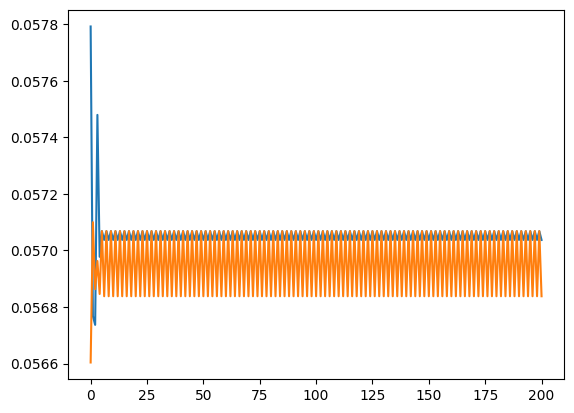

In [24]:
plt.plot(rewards_list)
plt.show()

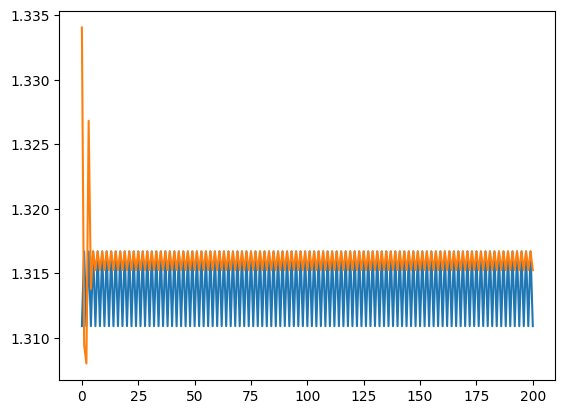

In [25]:
plt.plot(prices_list)
plt.show()